In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import re
import PyPDF2
from nltk.corpus import stopwords
from textblob import TextBlob
from collections import Counter
from wordcloud import WordCloud

In [2]:
# Create a file path variable 
# pdf_path = 'the_old_man_and_the_sea_-_ernest_hemingway.pdf'
pdf_path = 'IIBA Global Business Analysis Core Standard.pdf'

# Create a function to extract text from pdf
def extract_text_from_pdf(pdf_path):
    with open(pdf_path, 'rb') as pdf_file:
        pdf_reader = PyPDF2.PdfReader(pdf_file)
        pdf_len = len(pdf_reader.pages)
        text = ''
        for page_number in range(pdf_len):
            page = pdf_reader.pages[page_number]
            text += page.extract_text()
    return text

pdf_text = extract_text_from_pdf(pdf_path)
print(pdf_text)

 
 
 
	 	 	 	 	 	 	 	 	 	 	
  
           
  IIBA Global Business 
Analysis Core 
Standard 
A Companion to
A Guide to the Business Analysis Body of Knowledge® (BABOK® Guide) 
Version 3      
     
           
    
	 	 	 	 	 	 	 	 	
  
 
    
    
           
     
         
 
 International Institute of Busin ess Analysis, Toronto, Ontario,  Canada. 
© 2017 International Institute of Business Analysis. All rights r eserved. 
ISBN-13: 978-1-927584-09-5
This document is provided to the community for educational purp oses. IIBA® and does not warrant 
that it is suitable for any other purpose and makes no expresse d or implied warranty of any kind and
assumes no responsibility for er rors or omissions. No liability  is assumed for incidental or 
consequential damages in connection with or arising out of the use of the information contained
herein.
Permission is granted by IIBA to reproduce this document for pe rsonal, professional, or educational 
use.
IIBA®, the IIBA® logo, BABOK® and Bus

In [3]:
# Create a function to tokenize the text
def tokenize_text(text):
    tokens = nltk.word_tokenize(text)
    tokens = [token for token in tokens if re.match('^[a-zA-Z0-9]+$', token)]
    return tokens

tokens = tokenize_text(pdf_text)
tokens

['IIBA',
 'Global',
 'Business',
 'Analysis',
 'Core',
 'Standard',
 'A',
 'Companion',
 'to',
 'A',
 'Guide',
 'to',
 'the',
 'Business',
 'Analysis',
 'Body',
 'of',
 'Guide',
 'Version',
 '3',
 'International',
 'Institute',
 'of',
 'Busin',
 'ess',
 'Analysis',
 'Toronto',
 'Ontario',
 'Canada',
 '2017',
 'International',
 'Institute',
 'of',
 'Business',
 'Analysis',
 'All',
 'rights',
 'r',
 'eserved',
 'This',
 'document',
 'is',
 'provided',
 'to',
 'the',
 'community',
 'for',
 'educational',
 'purp',
 'oses',
 'and',
 'does',
 'not',
 'warrant',
 'that',
 'it',
 'is',
 'suitable',
 'for',
 'any',
 'other',
 'purpose',
 'and',
 'makes',
 'no',
 'expresse',
 'd',
 'or',
 'implied',
 'warranty',
 'of',
 'any',
 'kind',
 'and',
 'assumes',
 'no',
 'responsibility',
 'for',
 'er',
 'rors',
 'or',
 'omissions',
 'No',
 'liability',
 'is',
 'assumed',
 'for',
 'incidental',
 'or',
 'consequential',
 'damages',
 'in',
 'connection',
 'with',
 'or',
 'arising',
 'out',
 'of',
 'the',


In [4]:
# Create a function to remove stopwords
def remove_stopwords(tokens):
    stopword_list = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    return filtered_tokens

filtered_tokens = remove_stopwords(tokens)
filtered_tokens

['IIBA',
 'Global',
 'Business',
 'Analysis',
 'Core',
 'Standard',
 'Companion',
 'Guide',
 'Business',
 'Analysis',
 'Body',
 'Guide',
 'Version',
 '3',
 'International',
 'Institute',
 'Busin',
 'ess',
 'Analysis',
 'Toronto',
 'Ontario',
 'Canada',
 '2017',
 'International',
 'Institute',
 'Business',
 'Analysis',
 'rights',
 'r',
 'eserved',
 'document',
 'provided',
 'community',
 'educational',
 'purp',
 'oses',
 'warrant',
 'suitable',
 'purpose',
 'makes',
 'expresse',
 'implied',
 'warranty',
 'kind',
 'assumes',
 'responsibility',
 'er',
 'rors',
 'omissions',
 'liability',
 'assumed',
 'incidental',
 'consequential',
 'damages',
 'connection',
 'arising',
 'use',
 'information',
 'contained',
 'herein',
 'Permission',
 'granted',
 'IIBA',
 'reproduce',
 'document',
 'pe',
 'rsonal',
 'professional',
 'educational',
 'use',
 'logo',
 'Business',
 'Analysis',
 'Body',
 'registered',
 'trademarks',
 'owned',
 'International',
 'Instit',
 'ute',
 'Business',
 'Analysis',
 'chal

In [5]:
# Create a function to stem the tokens
def stem_tokens(filtered_tokens):
    stemmer = nltk.PorterStemmer()
    stemmed_tokens = [stemmer.stem(token) for token in filtered_tokens]
    return stemmed_tokens

stemmed_tokens = stem_tokens(filtered_tokens)
stemmed_tokens

['iiba',
 'global',
 'busi',
 'analysi',
 'core',
 'standard',
 'companion',
 'guid',
 'busi',
 'analysi',
 'bodi',
 'guid',
 'version',
 '3',
 'intern',
 'institut',
 'busin',
 'ess',
 'analysi',
 'toronto',
 'ontario',
 'canada',
 '2017',
 'intern',
 'institut',
 'busi',
 'analysi',
 'right',
 'r',
 'eserv',
 'document',
 'provid',
 'commun',
 'educ',
 'purp',
 'ose',
 'warrant',
 'suitabl',
 'purpos',
 'make',
 'express',
 'impli',
 'warranti',
 'kind',
 'assum',
 'respons',
 'er',
 'ror',
 'omiss',
 'liabil',
 'assum',
 'incident',
 'consequenti',
 'damag',
 'connect',
 'aris',
 'use',
 'inform',
 'contain',
 'herein',
 'permiss',
 'grant',
 'iiba',
 'reproduc',
 'document',
 'pe',
 'rsonal',
 'profession',
 'educ',
 'use',
 'logo',
 'busi',
 'analysi',
 'bodi',
 'regist',
 'trademark',
 'own',
 'intern',
 'instit',
 'ute',
 'busi',
 'analysi',
 'challeng',
 'statu',
 'ownership',
 'trademark',
 'term',
 'contain',
 'herein',
 'intend',
 'intern',
 'institut',
 'busi',
 'analysi',


In [6]:
# Create a funciton to lem the tokens
def lem_tokens(filtered_tokens):
    lemmer = nltk.WordNetLemmatizer()
    lemmed_tokens = [lemmer.lemmatize(token) for token in filtered_tokens]
    return lemmed_tokens

lemmed_tokens = lem_tokens(filtered_tokens)
lemmed_tokens

['IIBA',
 'Global',
 'Business',
 'Analysis',
 'Core',
 'Standard',
 'Companion',
 'Guide',
 'Business',
 'Analysis',
 'Body',
 'Guide',
 'Version',
 '3',
 'International',
 'Institute',
 'Busin',
 'es',
 'Analysis',
 'Toronto',
 'Ontario',
 'Canada',
 '2017',
 'International',
 'Institute',
 'Business',
 'Analysis',
 'right',
 'r',
 'eserved',
 'document',
 'provided',
 'community',
 'educational',
 'purp',
 'os',
 'warrant',
 'suitable',
 'purpose',
 'make',
 'expresse',
 'implied',
 'warranty',
 'kind',
 'assumes',
 'responsibility',
 'er',
 'rors',
 'omission',
 'liability',
 'assumed',
 'incidental',
 'consequential',
 'damage',
 'connection',
 'arising',
 'use',
 'information',
 'contained',
 'herein',
 'Permission',
 'granted',
 'IIBA',
 'reproduce',
 'document',
 'pe',
 'rsonal',
 'professional',
 'educational',
 'use',
 'logo',
 'Business',
 'Analysis',
 'Body',
 'registered',
 'trademark',
 'owned',
 'International',
 'Instit',
 'ute',
 'Business',
 'Analysis',
 'challenge',


In [7]:
# Create a function to perform POS tagging
def pos_tagging(tokens):
    pos_tagged_tokens = nltk.pos_tag(tokens, tagset='universal')
    return pos_tagged_tokens

pos_tagged_tokens = pos_tagging(lemmed_tokens)
pos_tagged_tokens

[('IIBA', 'NOUN'),
 ('Global', 'NOUN'),
 ('Business', 'NOUN'),
 ('Analysis', 'NOUN'),
 ('Core', 'NOUN'),
 ('Standard', 'NOUN'),
 ('Companion', 'NOUN'),
 ('Guide', 'NOUN'),
 ('Business', 'NOUN'),
 ('Analysis', 'NOUN'),
 ('Body', 'NOUN'),
 ('Guide', 'NOUN'),
 ('Version', 'NOUN'),
 ('3', 'NUM'),
 ('International', 'NOUN'),
 ('Institute', 'NOUN'),
 ('Busin', 'NOUN'),
 ('es', 'VERB'),
 ('Analysis', 'NOUN'),
 ('Toronto', 'NOUN'),
 ('Ontario', 'NOUN'),
 ('Canada', 'NOUN'),
 ('2017', 'NUM'),
 ('International', 'NOUN'),
 ('Institute', 'NOUN'),
 ('Business', 'NOUN'),
 ('Analysis', 'NOUN'),
 ('right', 'NOUN'),
 ('r', 'NOUN'),
 ('eserved', 'VERB'),
 ('document', 'NOUN'),
 ('provided', 'VERB'),
 ('community', 'NOUN'),
 ('educational', 'ADJ'),
 ('purp', 'NOUN'),
 ('os', 'NOUN'),
 ('warrant', 'NOUN'),
 ('suitable', 'ADJ'),
 ('purpose', 'ADJ'),
 ('make', 'VERB'),
 ('expresse', 'ADJ'),
 ('implied', 'ADJ'),
 ('warranty', 'NOUN'),
 ('kind', 'NOUN'),
 ('assumes', 'VERB'),
 ('responsibility', 'NOUN'),
 ('e

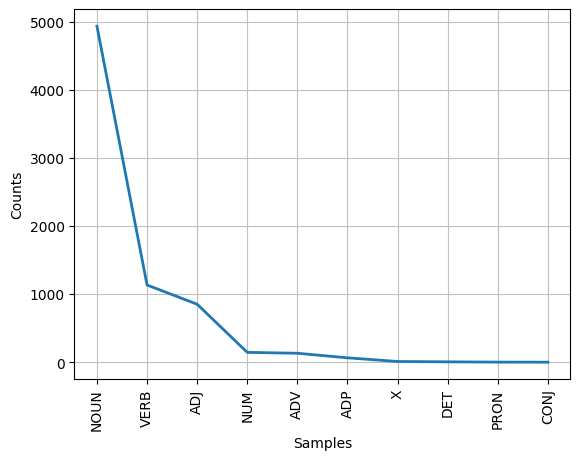

In [8]:
# Create a function to plot the POS tags
def plot_pos_tags(pos_tagged_tokens):
    pos_tags = [tag for word, tag in pos_tagged_tokens]
    pos_tag_counts = nltk.FreqDist(pos_tags)
    pos_tag_counts.plot()

plot_pos_tags(pos_tagged_tokens)

In [9]:
# Create a function to perform chunking
def chunking(pos_tagged_tokens):
    chunk_grammar = 'NP: {<DT>?<JJ>*<NN>}'
    chunk_parser = nltk.RegexpParser(chunk_grammar)
    chunked_tokens = chunk_parser.parse(pos_tagged_tokens)
    return chunked_tokens

chunked_tokens = chunking(pos_tagged_tokens)
chunked_tokens

In [10]:
# # Create a function to perform chinking 
# def chinking():
#     chinking_pattern = r"""
#         NP: {<.*>+}        
#         }<VB.*>{            
#     """
    
#     # Create a chinking parser with the defined pattern
#     chinking_parser = nltk.RegexpParser(chinking_pattern)
    
#     # Apply chinking to the chunked sentence
#     chinked_sentence = chinking_parser.parse(chunked_tokens)
    
#     return chinked_sentence

# chinked_tokens = chinking()
# chinked_tokens

In [11]:
# Create a function to perform NER
def ner(text):
    ner_tree = nltk.ne_chunk(text)
    return ner_tree

ner_result = ner(pos_tagged_tokens)
# for chunk in ner_result:
#     if hasattr(chunk, 'label') and chunk.label() is not None:
#         print(f"Entity: {' '.join(c[0] for c in chunk)}, Label: {chunk.label()}")

for chunk in ner_result:
    if isinstance(chunk, nltk.Tree):
        print(f"Entity: {' '.join(c[0] for c in chunk)}, Label: {chunk.label()}")

In [12]:
# Create a function to perform entity analysis
def entity_analysis(ner_result):
    entity_types = [chunk.label() for chunk in ner_result if isinstance(chunk, nltk.Tree)]
    entity_freq = Counter(entity_types)
    return entity_freq

entity_freq = entity_analysis(ner_result)
entity_freq

Counter()

In [13]:
# Create a function to perform sentiment analysis
def sentiment_analysis(text):
    # tokens = word_tokenize(text)
    words = [token for token in text]

    string = ' '.join(words)
    
    analysis = TextBlob(string)
    polarity_score = analysis.sentiment.polarity
    positive_score = max(0, analysis.sentiment.polarity)
    negative_score = -min(0, analysis.sentiment.polarity)
    neutral_score = 1 - abs(polarity_score)
    return positive_score, negative_score, neutral_score

positive_score, negative_score, neutral_score = sentiment_analysis(lemmed_tokens)

print("Positive Score:", positive_score)
print("Negative Score:", negative_score)
print("Neutral Score:", neutral_score)

Positive Score: 0.0772954586448905
Negative Score: 0
Neutral Score: 0.9227045413551095


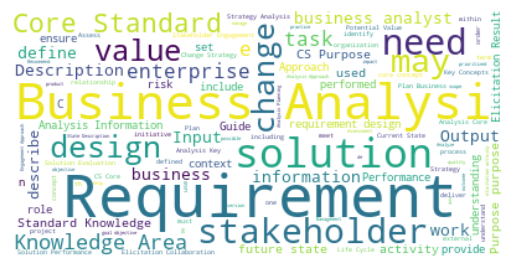

In [14]:
# Create a word cloud
def create_word_cloud(tokens):
    word_cloud = WordCloud(background_color='white').generate(' '.join(tokens))

    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    return word_cloud

word_cloud = create_word_cloud(lemmed_tokens)
word_cloud

In [15]:
def extract_sentiment_words(text):
    positive_words = []
    negative_words = []
    neutral_words = []

    for word in text:
        # word = word[0]
        polarity_score = TextBlob(word).sentiment.polarity
        if polarity_score > 0:
            positive_words.append(word)
        elif polarity_score < 0:
            negative_words.append(word)
        else:
            neutral_words.append(word)

    return positive_words, negative_words, neutral_words

positive_words, negative_words, neutral_words = extract_sentiment_words(lemmed_tokens)
for word in lemmed_tokens:
    print(f'Word: {word}, Sentiment: {TextBlob(word).sentiment.polarity}')

Word: IIBA, Sentiment: 0.0
Word: Global, Sentiment: 0.0
Word: Business, Sentiment: 0.0
Word: Analysis, Sentiment: 0.0
Word: Core, Sentiment: 0.0
Word: Standard, Sentiment: 0.0
Word: Companion, Sentiment: 0.0
Word: Guide, Sentiment: 0.0
Word: Business, Sentiment: 0.0
Word: Analysis, Sentiment: 0.0
Word: Body, Sentiment: 0.0
Word: Guide, Sentiment: 0.0
Word: Version, Sentiment: 0.0
Word: 3, Sentiment: 0.0
Word: International, Sentiment: 0.0
Word: Institute, Sentiment: 0.0
Word: Busin, Sentiment: 0.0
Word: es, Sentiment: 0.0
Word: Analysis, Sentiment: 0.0
Word: Toronto, Sentiment: 0.0
Word: Ontario, Sentiment: 0.0
Word: Canada, Sentiment: 0.0
Word: 2017, Sentiment: 0.0
Word: International, Sentiment: 0.0
Word: Institute, Sentiment: 0.0
Word: Business, Sentiment: 0.0
Word: Analysis, Sentiment: 0.0
Word: right, Sentiment: 0.2857142857142857
Word: r, Sentiment: 0.0
Word: eserved, Sentiment: 0.0
Word: document, Sentiment: 0.0
Word: provided, Sentiment: 0.0
Word: community, Sentiment: 0.0
Word

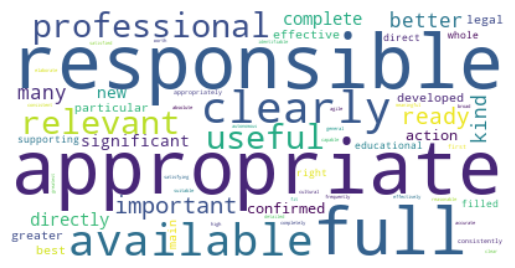

In [16]:
positive_wordcloud = create_word_cloud(positive_words)

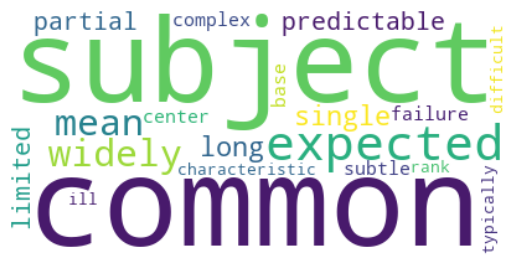

In [17]:
negative_wordcloud = create_word_cloud(negative_words)

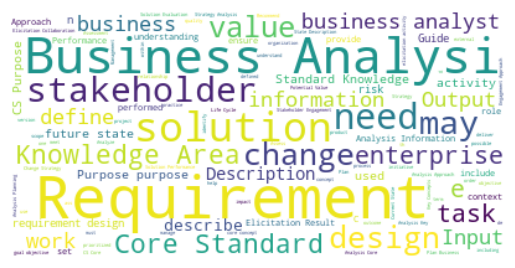

In [18]:
neutral_wordcloud = create_word_cloud(neutral_words)

In [37]:
def create_concordance(tokens, word):
    text = nltk.Text(tokens)
    return text.concordance(word)    

concordance = create_concordance(lemmed_tokens, 'analysis')

Displaying 25 of 222 matches:
IIBA Global Business Analysis Core Standard Companion Guide Busi
 Standard Companion Guide Business Analysis Body Guide Version 3 International
3 International Institute Busin es Analysis Toronto Ontario Canada 2017 Intern
7 International Institute Business Analysis right r eserved document provided 
onal educational use logo Business Analysis Body registered trademark owned In
 International Instit ute Business Analysis challenge status ownership tradema
d International Institute Business Analysis information regarding Guide Busine
formation regarding Guide Business Analysis Body Knowledge Guide International
e International Institute Business Analysis please visi contact info Purpose I
 info Purpose IIBA Global Business Analysis Core Standard IIBA Global Business
Core Standard IIBA Global Business Analysis Core Standard represents core fund
core fundamental practice business analysis described Guide Business Analysis 
 analysis described Guide Business A

In [38]:
concordance = create_concordance(lemmed_tokens, 'solution')

Displaying 25 of 170 matches:
 Analysis esign Definition CS 7 33 Solution Evaluation CS 8 38Table Contents i
 enterprise defi need recommending solution deliver value stakehol ders Busine
 role aligning designed deli vered solution need stakeholder activity business
rprise problem goal analyzing need solution devising strategy driving change f
six core concept BACCM Change Need Solution Stakeholder Value Context core con
 enhancing value delivere existing solution Solution specific way satisfying n
g value delivere existing solution Solution specific way satisfying ne need co
fic way satisfying ne need context solution satisfies need resolving problem f
ed th eir relationship need change solution Value worth within conmportance us
ny case assessed relative term one solution option mor e valuable another pers
on kind change need trying satisfy solution creating changing stakeholder invo
stakeholder consider value context solution core concept expe rience change ca
ice ise defining need 

In [40]:
concordance = create_concordance(lemmed_tokens, 'stakeholder')

Displaying 25 of 93 matches:
luding tool process documentation stakeholder business analyst respon sible eli
designed deli vered solution need stakeholder activity business analyst perform
ategy driving change facilitating stakeholder collaboration common job title pe
oncept BACCM Change Need Solution Stakeholder Value Context core concept idea f
ed Needs cause change motiv ating stakeholder act Chan ge also cause need erodi
fies need resolving problem faced stakeholder enabling stakeholder take advanta
roblem faced stakeholder enabling stakeholder take advantage opportunity Stakeh
holder take advantage opportunity Stakeholder group individual relationship cha
ble another perspective given set stakeholder Context circumstance influence in
atisfy solution creating changing stakeholder involved stakeholder consider val
ing changing stakeholder involved stakeholder consider value context solution c
commending solution deliver value stakeholder Business Analysis Information Bus
 outcome ma

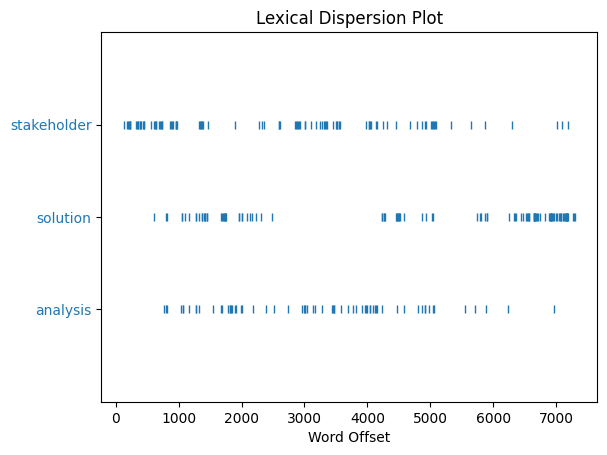

In [41]:
# Create a function to perform dispersion plot
def create_dispersion_plot(tokens, *args):
    text = nltk.Text(tokens)
    text.dispersion_plot(args)

create_dispersion_plot(lemmed_tokens, 'analysis', 'solution', 'stakeholder')

In [23]:
# Create a function to perform collocation
def create_collocation(tokens):
    text = nltk.Text(tokens)
    return text.collocation_list()

collocation = create_collocation(lemmed_tokens)
collocation

[('Business', 'Analysis'),
 ('Core', 'Standard'),
 ('business', 'analysis'),
 ('Purpose', 'purpose'),
 ('Standard', 'Knowledge'),
 ('Knowledge', 'Areas'),
 ('future', 'state'),
 ('knowledge', 'area'),
 ('Stakeholder', 'Engagement'),
 ('business', 'analyst'),
 ('Key', 'Concepts'),
 ('Elicitation', 'Results'),
 ('Potential', 'Value'),
 ('requirement', 'design'),
 ('Solution', 'Evaluation'),
 ('goal', 'objective'),
 ('Current', 'State'),
 ('Analysis', 'Key'),
 ('Elicitation', 'Collaboration'),
 ('IIBA', 'Global')]